In [129]:
#dependencies
import pandas as pd #used to bring in zone/zip csv
import geopandas #package to do all geographic analysis/cleaning
import matplotlib.pyplot as plt #used to plot graphs in notebook
from shapely.geometry import MultiPoint, Polygon, Point #used to create certain shapes
import math

In [18]:
# file with all zip codes to use
file = 'ny_new_york_zip_codes_geo.min.json'

In [19]:
# import geoJSON file
gdf = geopandas.read_file(file)
gdf

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,36,12205,3612205,B5,G6350,S,40906445,243508,+42.7187855,-073.8292399,N,"POLYGON ((-73.87052 42.75123, -73.86861 42.756..."
1,36,12009,3612009,B5,G6350,S,135241924,2168637,+42.6975663,-074.0355422,N,"POLYGON ((-74.10891 42.65300, -74.10889 42.653..."
2,36,14804,3614804,B5,G6350,S,144718714,232123,+42.3172588,-077.8479358,N,"POLYGON ((-77.92747 42.34775, -77.92632 42.347..."
3,36,14836,3614836,B5,G6350,S,77612958,131305,+42.5429182,-077.8781933,N,"MULTIPOLYGON (((-77.95599 42.47433, -77.95600 ..."
4,36,14536,3614536,B5,G6350,S,47193482,425175,+42.5439751,-078.0836709,N,"POLYGON ((-78.05030 42.53850, -78.05024 42.538..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1789,36,10503,3610503,B5,G6350,S,38497,0,+41.0265555,-073.8753095,N,"POLYGON ((-73.87383 41.02557, -73.87631 41.025..."
1790,36,10535,3610535,B5,G6350,S,1169775,154348,+41.3351693,-073.7939193,N,"POLYGON ((-73.81299 41.33241, -73.81285 41.332..."
1791,36,14569,3614569,B5,G6350,S,197585027,1112470,+42.7346931,-078.1685932,N,"POLYGON ((-78.19740 42.82658, -78.19619 42.826..."
1792,36,14478,3614478,B5,G6350,S,30311215,0,+42.5778234,-077.1263221,N,"POLYGON ((-77.09451 42.62465, -77.09428 42.624..."


In [20]:
# import file with Zones and Zip Codes to merge to gdf (to summarize by zone)
zip_df = pd.read_csv('nyp_zips.csv')
zip_df['zip'] = zip_df['zip'].astype(str) #convert zips to objext/string as stored in geoJSON/gdf
zip_df

,zone,zip
0,Hudson Valley,10566
1,Hudson Valley,10567
2,Hudson Valley,10598
3,Hudson Valley,10596
4,Hudson Valley,10521
...,...,...
152,Upper Westchester,10570
153,Upper Westchester,12508
154,Upper Westchester,10588
155,Upper Westchester,10537


In [22]:
# add zone column to gdf
gdf = gdf.merge(zip_df, left_on ='ZCTA5CE10', right_on ='zip', how ='left')
gdf.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,zone,zip
0,36,12205,3612205,B5,G6350,S,40906445,243508,+42.7187855,-073.8292399,N,"POLYGON ((-73.87052 42.75123, -73.86861 42.756...",NaN,NaN
1,36,12009,3612009,B5,G6350,S,135241924,2168637,+42.6975663,-074.0355422,N,"POLYGON ((-74.10891 42.65300, -74.10889 42.653...",NaN,NaN
2,36,14804,3614804,B5,G6350,S,144718714,232123,+42.3172588,-077.8479358,N,"POLYGON ((-77.92747 42.34775, -77.92632 42.347...",NaN,NaN
3,36,14836,3614836,B5,G6350,S,77612958,131305,+42.5429182,-077.8781933,N,"MULTIPOLYGON (((-77.95599 42.47433, -77.95600 ...",NaN,NaN
4,36,14536,3614536,B5,G6350,S,47193482,425175,+42.5439751,-078.0836709,N,"POLYGON ((-78.05030 42.53850, -78.05024 42.538...",NaN,NaN


In [23]:
# dissolve technique will group zones into a single geometric shape
world = gdf[['zone', 'geometry']]
zones = gdf.dissolve(by='zone')
zones.to_file("zones_file.geojson", driver="GeoJSON")
zones.head()

,geometry,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,zip
zone,,,,,,,,,,,,,
Central Harlem,"MULTIPOLYGON (((-73.94879 40.79748, -73.94910 ...",36,10030,3610030,B5,G6350,S,722465,0,+40.8182666,-073.9428564,N,10030
Chelsea and Clinton,"POLYGON ((-74.00273 40.74029, -74.00464 40.741...",36,10011,3610011,B5,G6350,S,1705243,0,+40.7420017,-074.0005940,N,10011
East Harlem,"MULTIPOLYGON (((-73.92869 40.78118, -73.93149 ...",36,10029,3610029,B5,G6350,S,2136945,0,+40.7916981,-073.9438757,N,10029
Gramercy Park,"POLYGON ((-73.98451 40.73696, -73.98445 40.737...",36,10017,3610017,B5,G6350,S,829152,0,+40.7523468,-073.9724169,N,10017
Greenwich Village and Soho,"POLYGON ((-74.01097 40.71630, -74.01138 40.716...",36,10013,3610013,B5,G6350,S,1430444,0,+40.7201070,-074.0049277,N,10013


In [116]:
#create shorthand for each zone

za = zones.loc[['Chelsea and Clinton'], 'geometry']
hv = zones.loc[['Hudson Valley'], 'geometry']

In [124]:
za.geom_type[0]

'Polygon'

<AxesSubplot:>

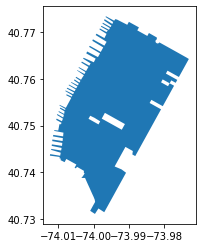

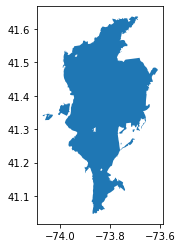

In [117]:
za.plot()
hv.plot()

### Technique 1 - Exterior Plotting

In [119]:
# capture length of exterior coordinates, then divide by 20
# note that we will only use the first shape ([0][0]) as it is the true shape of the zone
def coord_count(zones):
    lenlist = []
    for x in zones:
        lenlist.append(len(x[0].exterior.coords)/20)
    return lenlist

coord_count([za])

[14.05]

In [114]:
# round up the numbers from the previous example; take every nth coordinate from the exterior to get 20 coords
ex = za[0][0].exterior.coords[0::13]
hv_ex = hv[0][0].exterior.coords[0::437]
print(len(ex),len(hv_ex))

20 20


/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_2061/1951413470.py:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  ex = za[0][0].exterior.coords[0::13]
/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_2061/1951413470.py:3: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  hv_ex = hv[0][0].exterior.coords[0::437]


<AxesSubplot:>

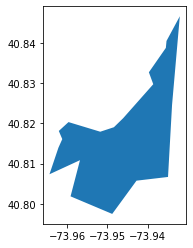

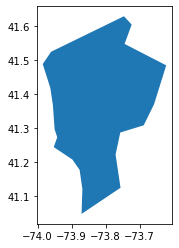

In [115]:
# plot the exterior points
geopandas.GeoSeries(Polygon(ex)).plot()
geopandas.GeoSeries(Polygon(hv_ex)).plot()


In [41]:
# create new geopandas dataframe to export to geoJSON file
d = {'Zone': ['Westchester', 'Hudson Valley'], 'geometry': [Polygon(ex), Polygon(hv_ex)]}
exterior_gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
exterior_gdf.to_file("zones_border.geojson", driver="GeoJSON")
exterior_gdf

/Users/paul.nisenson/.conda/envs/gis_project/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,Zone,geometry
0,Westchester,"POLYGON ((-73.84291 40.82848, -73.90496 40.930..."
1,Hudson Valley,"POLYGON ((-73.87082 41.04696, -73.86831 41.119..."


### Technique 2 - Buffer
Per documentation, returns an approximate representation of all points within a given distance of the this geometric object. At low distance, can be used to produce a clean reperesentation of data



In [98]:
# obtain the coordinate count; divide by 20
def coord_count_b(zones):
    lenlist = []
    for x in zones:
        lenlist.append(len(x[0][0].buffer(0.01,16, join_style = 2).exterior.coords)/20)
    return lenlist

# coord_count_b([za, hv])

In [38]:
# round up the numbers from the previous example; take every nth coordinate from the buffer exterior to get 20 coords
za_buffer = za[0][0].buffer(0.01,16, join_style = 2).exterior.coords[0::29]
hv_buffer = hv[0][0].buffer(0.01,16, join_style = 2).exterior.coords[0::68]
print(len(za_buffer),len(hv_buffer))


/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_4715/2362092353.py:1: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  za_buffer = za[0][0].buffer(0.01,16, join_style = 2).exterior.coords[0::29]
/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_4715/2362092353.py:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  hv_buffer = hv[0][0].buffer(0.01,16, join_style = 2).exterior.coords[0::68]


20 20


<AxesSubplot:>

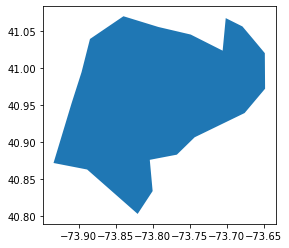

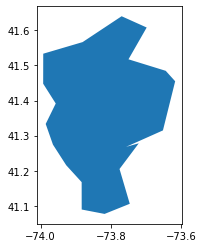

In [39]:
# plot the buffer points
geopandas.GeoSeries(Polygon(za_buffer)).plot()
geopandas.GeoSeries(Polygon(hv_buffer)).plot()

In [42]:
# create new geopandas dataframe to export to geoJSON file
d = {'Zone': ['Westchester', 'Hudson Valley'], 'geometry': [Polygon(za_buffer), Polygon(hv_buffer)]}
buffer_gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
buffer_gdf.to_file("buffer.geojson", driver="GeoJSON")
buffer_gdf

/Users/paul.nisenson/.conda/envs/gis_project/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,Zone,geometry
0,Westchester,"POLYGON ((-73.93437 40.87170, -73.91002 40.952..."
1,Hudson Valley,"POLYGON ((-73.99264 41.44787, -73.99244 41.533..."


## Scalable Method

In [176]:
# zone_names = ['Central Harlem', 'Chelsea and Clinton', 'East Harlem', 'Gramercy Park', 'Greenwich Village and Soho']
zone_names = pd.unique(zip_df['zone'])
keys = range(len(zone_names))
r = {}
for x in keys:
    r[x] = {}
    r[x]['Name'] = zone_names[x]
    r[x]['Group'] = zones.loc[[zone_names[x]], 'geometry']
    if r[x]['Group'].geom_type[0] == 'MultiPolygon':
        r[x]['Exterior'] = int(math.ceil(len(r[x]['Group'][0][0].exterior.coords)/20))
        r[x]['Exterior_Coords'] = r[x]['Group'][0][0].exterior.coords[0::r[x]['Exterior']]
        r[x]['Buffer'] = int(math.ceil(len(r[x]['Group'][0][0].buffer(0.01,16, join_style = 2).exterior.coords)/20))
        r[x]['Buffer_Coords'] = r[x]['Group'][0][0].buffer(0.01,16, join_style = 2).exterior.coords[0::r[x]['Buffer']]    
    else: 
        r[x]['Exterior'] = int(math.ceil(len(r[x]['Group'][0].exterior.coords)/20)) 
        r[x]['Exterior_Coords'] = r[x]['Group'][0].exterior.coords[0::r[x]['Exterior']]
        r[x]['Buffer'] = int(math.ceil(len(r[x]['Group'][0].buffer(0.01,16, join_style = 2).exterior.coords)/20))
        r[x]['Buffer_Coords'] = r[x]['Group'][0].buffer(0.01,16, join_style = 2).exterior.coords[0::r[x]['Buffer']]  
    

/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_2061/3075210173.py:10: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  r[x]['Exterior'] = int(math.ceil(len(r[x]['Group'][0][0].exterior.coords)/20))
/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_2061/3075210173.py:11: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  r[x]['Exterior_Coords'] = r[x]['Group'][0][0].exterior.coords[0::r[x]['Exterior']]
/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_2061/3075210173.py:12: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geom

/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_2061/3075210173.py:13: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  r[x]['Buffer_Coords'] = r[x]['Group'][0][0].buffer(0.01,16, join_style = 2).exterior.coords[0::r[x]['Buffer']]
/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_2061/3075210173.py:10: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  r[x]['Exterior'] = int(math.ceil(len(r[x]['Group'][0][0].exterior.coords)/20))
/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_2061/3075210173.py:11: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituen

In [177]:
r

{0: {'Name': 'Hudson Valley',
  'Group': zone
  Hudson Valley    MULTIPOLYGON (((-73.87082 41.04696, -73.87068 ...
  Name: geometry, dtype: geometry,
  'Exterior': 437,
  'Exterior_Coords': [(-73.87082, 41.046962),
   (-73.868307, 41.119449),
   (-73.876479, 41.176577),
   (-73.897809, 41.207095),
   (-73.952638, 41.243641),
   (-73.942397, 41.272536),
   (-73.95013, 41.296362),
   (-73.955141, 41.367163),
   (-73.962671, 41.417514),
   (-73.985027, 41.488049),
   (-73.960472, 41.524314),
   (-73.746009, 41.628857),
   (-73.723281, 41.604401),
   (-73.744098, 41.547342),
   (-73.62159, 41.484302),
   (-73.657381, 41.369717),
   (-73.687881, 41.307744),
   (-73.756815, 41.28664),
   (-73.770626, 41.221648),
   (-73.756103, 41.124003)],
  'Buffer': 68,
  'Buffer_Coords': [(-73.99264014889987, 41.44786909528936),
   (-73.99244172013998, 41.53330559443605),
   (-73.8803222254634, 41.566365443373904),
   (-73.76921016355605, 41.639999520573774),
   (-73.69786050413849, 41.60789767343343),
 

In [172]:
exterior = {r[x]['Name']: r[x]['Exterior_Coords'] for x in r}
buffer = {r[x]['Name']: r[x]['Buffer_Coords'] for x in r}


In [178]:
ex_n = [r[x]['Name'] for x in r]
ex_c = [Polygon(r[x]['Exterior_Coords']) for x in r]
bf_c = [Polygon(r[x]['Buffer_Coords']) for x in r]

In [179]:
d = {'Zone': ex_n, 'geometry': ex_c}
e = {'Zone': ex_n, 'geometry': bf_c}
ex_gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
bf_gdf = geopandas.GeoDataFrame(e, crs="EPSG:4326")
ex_gdf.to_file("exterior.geojson", driver="GeoJSON")
bf_gdf.to_file("buffer.geojson", driver="GeoJSON")
bf_gdf

/Users/paul.nisenson/.conda/envs/gis_project/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/paul.nisenson/.conda/envs/gis_project/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,Zone,geometry
0,Hudson Valley,"POLYGON ((-73.99264 41.44787, -73.99244 41.533..."
1,East Harlem,"POLYGON ((-73.94648 40.78345, -73.94120 40.794..."
2,Gramercy Park,"POLYGON ((-74.00002 40.73263, -74.00138 40.748..."
3,Upper East Side,"POLYGON ((-73.97484 40.75500, -73.97925 40.772..."
4,Central Harlem,"POLYGON ((-73.97987 40.80303, -73.97764 40.818..."
5,Chelsea and Clinton,"POLYGON ((-74.02551 40.74852, -74.02788 40.758..."
6,Upper West Side,"POLYGON ((-74.00211 40.76763, -73.99437 40.790..."
7,Washington Heights,"POLYGON ((-73.96209 40.81051, -73.98654 40.818..."
8,Inwood,"POLYGON ((-73.94286 40.82631, -73.93631 40.851..."
9,Greenwich Village and Soho,"POLYGON ((-74.02783 40.71599, -74.02444 40.732..."
